# Introduction
In this notebook we will be learning about how to set custom named entity recognition (NER) in spacy.

* **What is Named Entity**?

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. 


* **About spaCy** :-

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion. [More](https://spacy.io/)

* **NLTK vs spaCy** :-

While NLTK provides access to many algorithms to get something done, spaCy provides the best way to do it. It provides the fastest and most accurate syntactic analysis of any NLP library released to date. It also offers access to larger word vectors that are easier to customize. For an app builder mindset that prioritizes getting features done, spaCy would be the better choice. [More](https://www.activestate.com/blog/natural-language-processing-nltk-vs-spacy/#:~:text=While%20NLTK%20provides%20access%20to,that%20are%20easier%20to%20customize.)

* **Some [Features](https://spacy.io/usage/spacy-101#features) of spaCy** :- 

    * Tokenization
    * Part-of-speech (POS) Tagging
    * Lemmatization
    * Named Entity Recognition (NER)
    * Similarity
    * Text Classification

We will be focusing on NER.

* **What is NER ?**

Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. [More](https://en.wikipedia.org/wiki/Named-entity_recognition)

Above NER example shows all named entities which are present in given sentence.




**Myself [Amar Sharma](https://www.kaggle.com/amarsharma768)  and my team member [Parvez Shaikh](https://www.kaggle.com/parvezahmedshaikh) created many such notebooks as part of the course work under "Master in Data Science Programme" at [Suven](https://datascience.suvenconsultants.com/) , under mentor-ship of [Rocky Jagtiani](https://www.linkedin.com/in/rocky-jagtiani-3b390649/) .**



# **Coding part**

In [ ]:
# pip install spacy

# Install spacy if not already installed.

In [ ]:
import spacy
import pickle
import random

# Import required modules

First, we will execute spacy model on a simple sentence just to get familiar with it.

In [ ]:
test = spacy.load('en')
sent = '''My name is Amar Sharma, i stay in Mumbai.
The 2020 america presidential election is scheduled for Tuesday, November 3.'''

ts = test(sent)
for ent in ts.ents:
  print(f'{ent.label_.upper():{10}} - {ent.text}')


## **Explanation of above code** :-

**test = spacy.load('en')**, here **load()** is used to load model, '**en**' specifies name/unicode of model to load i.e., English. [More](https://spacy.io/api/top-level#spacy.load)

**sent** contains sentence passed for extracting named entities.

**ts = test(sent)**, here we pass sent variable to test (object of spacy english model) which learns POS tags,NER etc and stores information in ts.

**ts.ents** Here ents property contains all the entities as tuple identified by our model from sents.

**ent.label_** contains label**(PERSON / GPE / DATE)** which is given by model to that entitiy.

**ent.text** contains entity**(Amar Sharma / Mumbai / 2020 / america)** as string.


Have you noticed that even as we specified america word initial character 'a' as smaller case still our model managed to identiy it as GPE.

In [ ]:
# one more example

for ent in test("Apple is looking at buying U.K. startup for $1 billion").ents:
  print(f'{ent.label_.upper():{10}} - {ent.text}')

By the way, we can use explain method of spacy to know in what a named entites signifies. 

See below code.

In [ ]:
print(f'PERSON - {spacy.explain("PERSON")}')
print(f'GPE    - {spacy.explain("GPE")}')
print(f'DATE   - {spacy.explain("DATE")}')
print(f'MONEY  - {spacy.explain("MONEY")}')

[More](https://spacy.io/api/annotation#named-entities) predefined named entites present in spacy.

# **Why we are creating custom NER ?**

Now, if spacy has so many named entities predefined then why are we creating custom NER.
Well, in simple words we never trained our model it was pre trained, we directly created object of it and started extracting information on it which our model did very well. But, what happens when we try to get all named entities on a dataset that it was never trained  for. We are going to try one such example.

We will extract data from a resume and use this data as test data for our model to predict named entities from.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# since our resume is in pdf format we will use PyMuPDF to extract data from it.
# You can also use PyPDF2.

In [ ]:
pip install PyMuPDF # https://pypi.org/project/PyMuPDF/

In [ ]:
import sys,fitz
fname = '/kaggle/input/dataset-for-resume-information-retrieval/Alice Clark CV.pdf'
doc= fitz.open(fname)
alice_cv=""
for page in doc:
  alice_cv = alice_cv + str(page.getText())

print(alice_cv)

# we have extracted the data from pdf file using PyMuPDF and stored in alice_cv variable.

Now, we can pass our test data on our pre trained spacy model and evaluate how good it has performed.

In [ ]:
test = spacy.load('en')
ts = test(" ".join(alice_cv.split('\n'))) # we have splitted our data with '\n' and rejoined with space. 

**ts** variable contains all POS tags,NER etc in it. We will extract only NER and manually verify output.

In [ ]:
# Here, we are only extracting all PERSON named entities.

for ent in ts.ents:
  if ent.label_.upper() == 'PERSON':
    print(f'{ent.label_.upper():{10}} - {ent.text}')

As you can see our pre trained model did not perform well on test data. Only name('Alice Clark') was labelled correctly and rest all are labelled incorrect.

In [ ]:
# Here, we are only extracting all ORG named entities.

for ent in ts.ents:
  if ent.label_.upper() == 'ORG':
    print(f'{ent.label_.upper():{10}} - {ent.text}')

ORG named entities are also labelled incorrect except 'MICROSOFT'.

Now, in these types of situation where labelling are almost incorrect what should we do?

# Solution 


This is the reason why we have to first train our spacy model on some manually labelled data and create custom NER. 

Since, for testing we took resume data means we are here dealing with resume's, so we have to first train our spacy model on some manually labelled resume data. For training purpose we got data from online but you can create training data according to your requirement.

In [ ]:
train_data = pickle.load(open('/kaggle/input/dataset-for-resume-information-retrieval/train_data.pkl','rb'))
print(f"Training data consist of {len(train_data)} manually labelled resume's.")

We have our training data stored in pickle file.

In [ ]:
# Checking format of one resume data

train_data[97]

### Anatomy of our train data

Our train data is stored as a tuple consisting of 200 resume data, each resume data consist of 2 parts/indexes.

* First index  [0] consist of all details(name, degree, designation, compaines worked at) in resume.
* Second index [1] consist of a dictionary object having only one key i.e., 'entities' and look carefully at its value.

Value of 'entities' key has a list of tuples and in each tuple we have some number and some labelling. 

For Eg :- **(0, 15, 'Name')**, here 0 denotes start index and 15 denotes end index of label 'Name', which is 'Ramesh chokkala'.
Similarly, we can see that all the other tuple also has some start and end index alongwith their respective label. This is how you can manually create data for training.

**Note** :- label of all training data should be same i.e., if you have specified label as 'Name' for one resume then for all the resume data wherever name is present for that label should be as 'Name' only and not something else.

As we have our training data ready, we will now train our spacy model and add custom NER.

In [ ]:
# loading blank spacy model as we want to customize our model.
# spacy.blank('en') will create a blank model of a given language class i.e., for here English.

nlp = spacy.blank('en') 

### Spacy pipeline

Below is the pipeline which is created when we pass our data to spacy model. 

Recommended [More](https://spacy.io/usage/processing-pipelines).

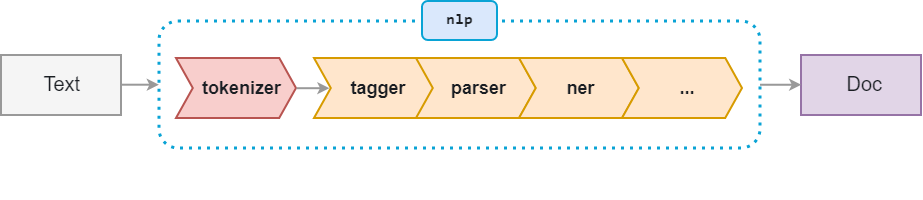

In [ ]:
# Creating a function to train our model

def train_model(train_data):
    
  if 'ner' not in nlp.pipe_names:# Checking if NER is present in pipeline
    ner = nlp.create_pipe('ner') # creating NER pipe if not present
    nlp.add_pipe(ner, last=True) # adding NER pipe in the end

  for _, annotation in train_data: # Getting 1 resume at a time from our training data of 200 resumes
    for ent in annotation['entities']: # Getting each tuple at a time from 'entities' key in dictionary at index[1] i.e.,(0, 15, 'Name') and so on
      ner.add_label(ent[2])  # here we are adding only labels of each tuple from entities key dict, eg:- 'Name' label of (0, 15, 'Name')
    
  # In above for loop we finally added all custom NER from training data.
    

  other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner'] # getting all other pipes except NER.
  with nlp.disable_pipes(*other_pipes): # Disabling other pipe's as we want to train only NER.
        optimizer = nlp.begin_training()
        
        for itn in range(10):         # trainig model for 10 iteraion
            print('Starting iteration ' + str(itn))
            random.shuffle(train_data) # shuffling data in every iteration 
            losses = {}
            for text, annotations in train_data:
              try:
                nlp.update(
                    [text],        #batch of texts
                    [annotations], #batch of annotations
                    drop=0.2,      #dropout rate -makes it harder to memorise
                    sgd=optimizer, #callable to update weights
                    losses=losses) #Dictionary to update with the loss, keyed by pipeline component.
              except Exception as e:
                pass

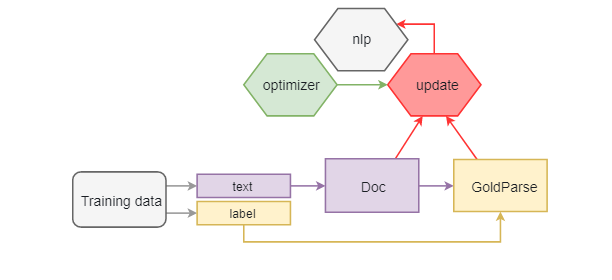

We call our above created funcion **'train_model'** to learn from training data.

In [ ]:
# pass train data to function.

train_model(train_data)

In [ ]:
# Saving our trained model to re-use.

nlp.to_disk('nlp_model')

In [ ]:
# Loading our trained model

nlp_model = spacy.load('nlp_model')

In [ ]:
# Checking all the custom NER created

nlp_model.entity.labels

In [ ]:
doc = nlp_model(" ".join(alice_cv.split('\n')))
for ent in doc.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

From above output we can clearly see that our custom trained spacy model has worked very well and labelled our testing data correctly but not 100% as the skills are not mentioned in output. This could be due to less training data. To increase accuracy we should train our model on different formats of data.

# Conclusion

As per our requirement, we can manually create data for training, add custom NER and train our model.

# References 

* https://spacy.io/
* https://github.com/laxmimerit/Resume-and-CV-Summarization-and-Parsing-with-Spacy-in-Python

I would like to humbly and sincerely thank my mentor [Rocky Jagtiani](https://www.linkedin.com/in/rocky-jagtiani-3b390649/). He is more of a friend to me then mentor. The Python for Data Science taught by him and various assignments we did and are still doing is the best way to learn and skill in Data Science field.

Recommended https://datascience.suvenconsultants.com/